In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
from scipy import optimize
from numpy import e
from numpy import arctan2
from numpy import diag
from numpy import sqrt
from numpy import pi

In [22]:
f_kHz = [ 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] 
P = [ 0.0879646, 0.105558, 0.130188, 0.16286, 0.199051, 0.246301, 0.309635, 0.395087, 0.512959, 0.693161, 0.942478, 1.27674, 1.6663, 2.03575, 2.26823, 2.42531, 2.54658, 2.62637, 2.6735, 2.7445, 2.78031, 2.80984, 2.83309, 2.85005, 2.86073, 2.86513, 2.86325, 2.9355, 2.90283, 2.92671, 2.92482] 
sP = [ 0.000392699, 0.000471239, 0.000549779, 0.000628319, 0.000706858, 0.000785398, 0.000863938, 0.000942478, 0.00102102, 0.00109956, 0.00294524, 0.00314159, 0.00333794, 0.00353429, 0.00373064, 0.00392699, 0.00412334, 0.00431969, 0.00451604, 0.00471239, 0.00490874, 0.00510509, 0.00530144, 0.00549779, 0.00569414, 0.00589049, 0.00608684, 0.00628319, 0.00647953, 0.00667588, 0.00687223] 

In [59]:
from numpy import arctan
def fitfunc(x,R,L,C):
    w=x*1E3*2*pi;
    t=R/(1/(C*w)-L*w);
    value=arctan(t);
    value[value<0]+=pi
    return value
                   
p_init = [25.88,0.0008794,103.4E-9] # valori iniziali 
#_pts = np.linspace(f_kHz[0], f_kHz[-1],10000)
#plt.plot(_pts, fitfunc(_pts, *p_init), label="fit",linewidth=3.0)
p_best, pcov = optimize.curve_fit(
    fitfunc, f_kHz, P,          # assegno funzione di fit, ascisse e ordinate
   sigma=sP,                     # assegno gli errori sulle ordinate
    p0=p_init, bounds=(0, +np.inf) # imposto i valori iniziali dei parametri e
)      # intervalli ammessi [0, +∞)

---------------------------
Best fit values without errors
---------------------------
R = 25.17647250435355  +-  1.3290273657595928 Ohm
L = 0.0008505403310492336  +-  3.098349246757628e-05 H
C = 1.0649804567909666e-07  +-  4.1645270011297395e-09 F
---------------------------


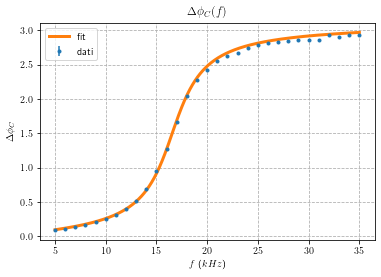

In [60]:
print("---------------------------")
print("Best fit values without errors")
print("---------------------------")
print("R =", p_best[0]," +- ",sqrt(diag(pcov)[0]), "Ohm")
print("L =", p_best[1]," +- ",sqrt(diag(pcov)[1]), "H")
print("C =", p_best[2]," +- ",sqrt(diag(pcov)[2]),"F")
print("---------------------------")
fig=plt.figure()
plt.grid(linestyle='--')
plt.rc('text', usetex=True)
plt.errorbar(f_kHz, P, yerr=sP, fmt='.', label='dati')
_pts = np.linspace(f_kHz[0], f_kHz[-1],10000)
plt.plot(_pts, fitfunc(_pts, *p_best), label="fit",linewidth=3.0)
plt.title("$\Delta \phi _C (f) $")
plt.xlabel("$f$ ($ kHz$)")
plt.ylabel("$\Delta \phi _C$")
plt.legend();
#fig.savefig('fitnosigma_rlr.pdf')

In [65]:
def resfunc(x):
    R=p_best[0]
    L=p_best[1]
    C=p_best[2]
    w=x*1E3*2*pi;
    t=R/(1/(C*w)-L*w);
    return arctan(t);

chisq= 3805.4193678726883


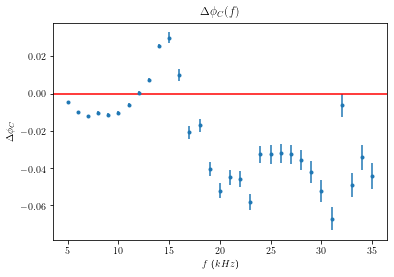

In [85]:
res = []
chisqv=0
for i in range (0,len(P)):
    if resfunc(f_kHz[i])>0:
          value=resfunc(f_kHz[i])
    else:
        value=resfunc(f_kHz[i])+pi
    res.insert(i,P[i]-value)
    chisqv+=(res[i]/sP[i])**2
#sigma_P=np.full(len(P),sigmapost(f_kHz,P))
print("chisq=",chisqv)

plt.figure(1)
plt.errorbar(f_kHz, res, yerr=sP, fmt='.')
plt.axhline(0, color='r')
plt.title("$\Delta \phi _C (f) $")
plt.xlabel("$f$ ($ kHz$)")
plt.ylabel("$\Delta \phi _C$")
plt.show()

In [87]:
def sigmapost(f_kHz,P):
    sigmasq=0
    for i in range (0,len(P)):
        sigmasq+=(res[i])**2
    return sqrt(sigmasq/(len(P)-4))
sigma_P=np.full(len(P),sigmapost(f_kHz,P))
print(sigma_P[0])

0.035991700257866646


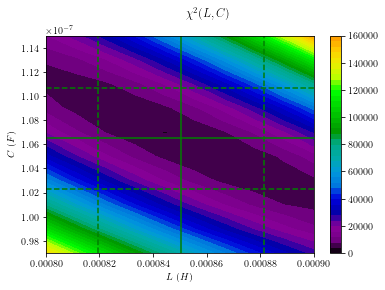

In [95]:
import matplotlib.pyplot as plt
def fitfuncplot(x,L,C):
    R=p_best[0]
    w=x*1E3*2*pi;
    t=R/(1/(C*w)-L*w);
    return arctan(t);
def chisquared(L,C):
    chisqv=0
    for i in range (0,len(P)):
        if fitfuncplot(f_kHz[i],L,C)>0:
              value=fitfuncplot(f_kHz[i],L,C)
        else:
            value=fitfuncplot(f_kHz[i],L,C)+pi
        chisqv+=((P[i]-value)/sP[i])**2
    return chisqv
fig=plt.figure()
y=np.linspace(97E-9,115E-9,10)
x=np.linspace(0.80E-3,0.90E-3,10)
#y=np.linspace(52,56,10)
z = np.array([chisquared(i,j) for j in y for i in x])
X, Y = np.meshgrid(x, y)
Z = z.reshape(10, 10)
plt.contourf(X, Y, Z,50,vmin=0,vmax=200000,cmap='nipy_spectral')
fig.suptitle(' $\chi ^2 (L,C)$ ')
plt.xlabel('$L$ $(H)$')
#plt.ylabel('$R$ ($\Omega$)')
plt.ylabel('$C$ $(F)$')
plt.colorbar()
plt.axvline(p_best[1], color='g')
plt.axhline(p_best[2], color='g')
plt.axvline(p_best[1]+sqrt(diag(pcov)[1]),color='g',linestyle='--')
plt.axvline(p_best[1]-sqrt(diag(pcov)[1]),color='g',linestyle='--')
plt.axhline(p_best[2]+sqrt(diag(pcov)[2]),color='g',linestyle='--')
plt.axhline(p_best[2]-sqrt(diag(pcov)[2]),color='g',linestyle='--')
#fig.savefig('chisqLCrlr.pdf')